# Face Recognition

In [1]:
# set up pose recognizer network

from conx import *

net = Network("Pose recognizer")

conx, version 3.4.0
Using Theano backend.


In [2]:
# uncomment one of the following lines:

datafile = 'cmu_faces_full_size'
#datafile = 'cmu_faces_half_size'
#datafile = 'cmu_faces_quarter_size'

net.dataset.get(datafile)
net.dataset.split(0.40)  # use 40% of the dataset for validation
net.dataset.shuffle()
net.dataset.summary()

Input Summary:
   count  : 624 (375 for training, 249 for testing)
   shape  : [(120, 128)]
   range  : (0.0, 1.0)
Target Summary:
   count  : 624 (375 for training, 249 for testing)
   shape  : [(4,)]
   range  : (0, 1)


In [4]:
net.dataset.inputs.shape

[(120, 128)]

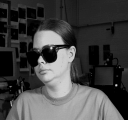

In [5]:
array2image(net.dataset.inputs[0])

In [6]:
net.dataset.targets[0]

[1, 0, 0, 0]

In [11]:
net.add(Layer('input', net.dataset.inputs.shape[0]))
net.add(FlattenLayer("flatten"))
net.add(Layer('hidden', 3, activation='sigmoid'))
net.add(Layer('output', 4, activation='sigmoid'))
net.connect()
net.compile(loss='mean_squared_error', optimizer=SGD(lr=0.3, momentum=0.1))

In [12]:
net.dashboard()

<IPython.core.display.Javascript object>

Dashboard(children=(VBox(children=(VBox(children=(HBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), Select(description='Features:', options=('',), rows=1, value=''), Button(icon='refresh', layout=Layout(width='40px'), style=ButtonStyle())), layout=Layout(height='40px')), HBox(children=(IntSlider(value=0, continuous_update=False, description='Dataset index', layout=Layout(width='95%'), max=374), Label(value='of 0', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='95%')), HTML(value='<p style="text-align:center"><svg id=\'Pose recognizer\' xmlns=\'http://www.w3.org/2000/svg\' viewBox="0 0 350 457" height="780" image-rendering="pixelated">\n    <defs>\n        <marker id="arrow" markerWidth="10" markerHeight="10" refX="9" refY="3" orient="auto" markerUnits="strokeWidth">\n          <path d="M0,0 L0,6 L9,3 z" fill="black" />\n        </marker>\n    </defs><text x="175.0" y="12.5" font-family="monospace" font-size="15" text-anchor="middle" alignment-baseline="central">Pose recognizer</text><rect x="74.0" y="29" width="202" height="52" style="fill:none;stroke:black;stroke-width:2"/><image id="Pose recognizer_output_1" class="Pose recognizer_output" x="75.0" y="30" height="50" width="200" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhBAABAIcAAAAA9QAAlQAAxAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACwAAAAABAABAAAIBwABABAQICAAOw=="><title>Layer: output (output)\n shape = (4,)\n Keras class = Dense\n activation = sigmoid</title></image><text x="280.0" y="57.0" font-family="monospace" font-size="12" text-anchor="start" alignment-baseline="central">output</text><line x1="175.0" y1="109" x2="175.0" y2="82" stroke="black" stroke-width="2" marker-end="url(#arrow)"><title>Weights from hidden to output\n output/kernel has shape (3, 4)\n output/bias has shape (4,)</title></line><rect x="99.0" y="109" width="152" height="52" style="fill:none;stroke:black;stroke-width:2"/><image id="Pose recognizer_hidden_2" class="Pose recognizer_hidden" x="100.0" y="110" height="50" width="150" preserveAspectRatio="none" href="data:image/gif;base64,R0lGODdhAwABAIcAAAAA2AAAnQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [13]:
net.reset()
net.evaluate()

{'acc': 0.0,
 'loss': 0.2563292597134908,
 'val_acc': 0.0,
 'val_loss': 0.25538724409528524}

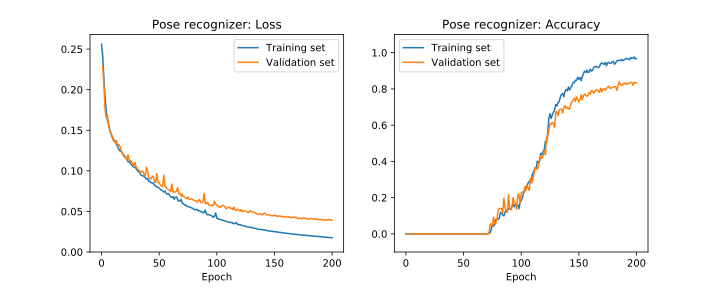

       |  Training |  Training |  Validate |  Validate 
Epochs |     Error |  Accuracy |     Error |  Accuracy 
------ | --------- | --------- | --------- | --------- 
#  200 |   0.01760 |   0.96791 |   0.03906 |   0.83200 


In [14]:
net.train(200, accuracy=1.0, tolerance=0.25, report_rate=5, plot='notebook')

In [15]:
net.train(10, accuracy=1.0, tolerance=0.25, report_rate=3)

Training...
       |  Training |  Training |  Validate |  Validate 
Epochs |     Error |  Accuracy |     Error |  Accuracy 
------ | --------- | --------- | --------- | --------- 
#  200 |   0.01760 |   0.96791 |   0.03906 |   0.83200 
#  203 |   0.01731 |   0.97594 |   0.03872 |   0.85200 
#  206 |   0.01696 |   0.97326 |   0.03936 |   0.83600 
#  209 |   0.01673 |   0.97059 |   0.03817 |   0.84800 
#  210 |   0.01663 |   0.97594 |   0.03842 |   0.84000 


In [16]:
net.train(10, accuracy=1.0, tolerance=0.25, report_rate=5)

Training...
       |  Training |  Training |  Validate |  Validate 
Epochs |     Error |  Accuracy |     Error |  Accuracy 
------ | --------- | --------- | --------- | --------- 
#  210 |   0.01663 |   0.97594 |   0.03842 |   0.84000 
#  215 |   0.01619 |   0.97326 |   0.03833 |   0.84800 
#  220 |   0.01571 |   0.98128 |   0.03782 |   0.84400 
#  220 |   0.01571 |   0.98128 |   0.03782 |   0.84400 


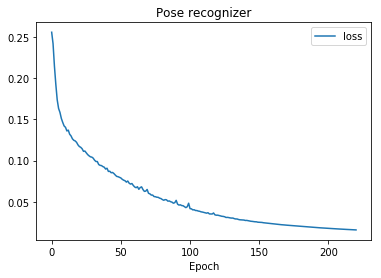

In [17]:
net.plot()

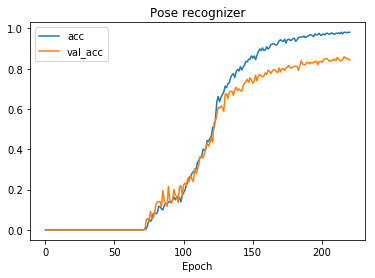

In [18]:
net.plot(['acc', 'val_acc'])

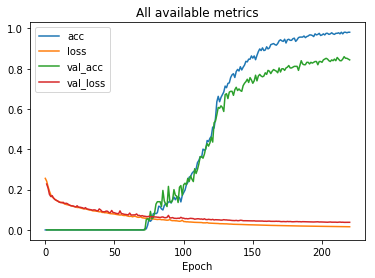

In [19]:
net.plot(net.get_metrics(), title="All available metrics")

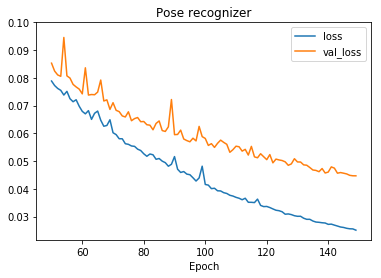

In [20]:
net.plot(['loss', 'val_loss'], ymax=0.1, start=50, end=150)

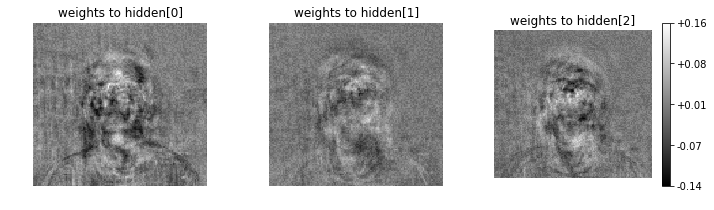

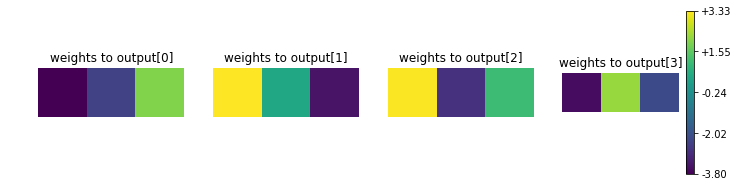

In [23]:
net.plot_layer_weights('hidden', vshape=net.dataset.inputs.shape[0])
net.plot_layer_weights('output', cmap='viridis')

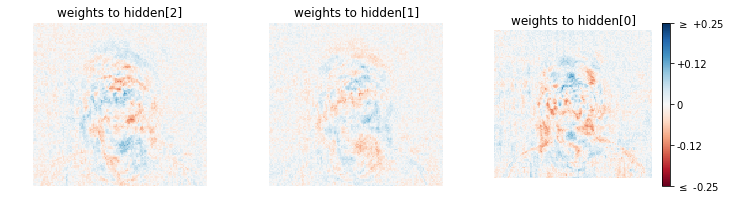

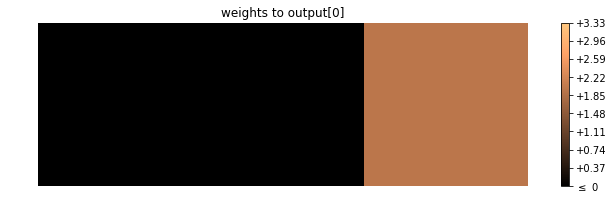

In [24]:
# colorbar colors or values can be easily changed
net.plot_layer_weights('hidden', vshape=net.dataset.inputs.shape[0], 
                       units=(2,1,0), cmap="RdBu", wrange=(-0.25, 0.25))
net.plot_layer_weights('output', units=0, wmin=0, cmap="copper", ticks=10)

In [25]:
net.show_unit_weights('output', 0)

-3.80 -2.43  1.98 
